In [341]:
import pandas
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import norm, gaussian_kde
from scipy import interpolate
import numpy.linalg as alg
from numpy.linalg import inv


ImportError: cannot import name 'quantile'

In [14]:
#Import data 
data=pandas.read_csv('/Users/martinbecuwe/Documents/ENSAE 3A/Semestre 1 3A ENSAE/Semi and non parametric/SemiAndNonPara/StudentsPerformance.csv')
data.describe()

#Je conserve que variables qualitatives pour l'exemple
data=data.iloc[:,5:8]


#Valeurs manquantes?
#???

### Transformer valeurs quali en quantitatives
#???

#Algorithm 1 (Implementation for Parametric and Series Estimation).
#1.(1) Set Gammatil(n) ≡ 1−0.1/logn. 
#from the K-variate standard normal distribution N (0,IK). 

n=len(data)
R=50 # A changer?

K=10 # Différentes valeurs de ?? a changer donc

#Simulate a large number R of draws denoted Z1,...,ZR 
Z = defaultdict(list)

mean=np.zeros(K)
cov=np.identity(K)
for i in range(1,R+1):
    Z[i]=np.random.multivariate_normal(mean, cov)




# (2) Compute Ω􏰜n, a consistent estimator for the large
#samplevarianceof√n􏰉β􏰜 −β 􏰊. 
#(3)Foreachv∈V,computeg􏰜(v)=p (v)′Ω􏰜1/2 andset √nn nn
# sn(v) = ∥g􏰜(v)∥/ n. 
#    (4) Compute kn,V( γ ̃ n ) = γ ̃ n − q u a n t i l e o f { s u p 􏰁 g􏰜 ( v ) ′ Z r / ∥ g􏰜 ( v ) ∥ 􏰂 , r = 1 , . . . , R } , a n d
#v∈V
#V􏰜 n = { v ∈ V : θ􏰜 n ( v ) ≤ m i n 􏰉 θ􏰜 n ( v ) + k n , V ( γ ̃ n ) s n ( v ) 􏰊 + 2 k n , V ( γ ̃ n ) s n ( v ) } ,
#v∈V
#kn,V􏰜n (p)=p−quantileof 􏰕sup􏰁g􏰜(v)′Zr/∥g􏰜(v)∥􏰂,r=1,...,R􏰖,andset






[-0.18959348  0.19882775  0.81379205  0.94728054 -0.52500763 -0.87419281
 -1.94846162 -0.70756012 -1.14492229  0.02754357] [-0.21110953  0.66985956 -2.01581175  0.11486875 -0.53647543  0.28632941
  0.6669517  -2.46265159 -0.96377862  0.51918809]


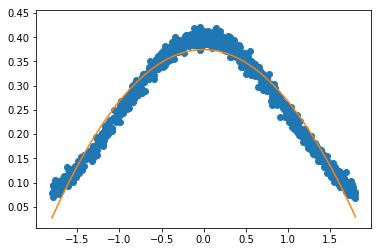

[-2.05490684e-02 -2.15302078e-04  2.16327582e-01  1.20299030e-03
 -9.80074061e-01 -1.72190246e-03  1.99309780e+00]
kp 2.185532745204996
upper bound corrigé 0.06754228904233625


In [377]:
#Monte Carlo
import pandas
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import norm, gaussian_kde
from scipy import interpolate
import numpy.linalg as alg
from numpy.linalg import inv


#Data-Generating Process

L=1
delta=0.01
n=1000
mean=np.zeros(n)
cov=np.identity(n)

V=np.random.uniform(low=-2.0, high=2.0, size=n)
uchap=np.random.multivariate_normal(mean, cov)


U = defaultdict(list)
Y = defaultdict(list)
for j in range(n):
    U[j]=min(max(-3,delta*uchap[j]),3)
    Y[j]=L*math.exp(-V[j]**2/2)/math.sqrt(2*math.pi)+U[j]

#On supprime outliers
Yt=[]
Vt=[]
for j in range(n):
    if V[j]>-1.8:
        if V[j]<1.8:
            Vt.append(V[j])
            Yt.append(Y[j])

plt.scatter(Vt,Yt)
aa=np.column_stack((Vt,Yt))

#Tried to do Bsplines but dont understand how to get estimates etc... not a good fit anyway -> polynomials

#Series estimation using polynomial: pretty good fit


from scipy.interpolate import CubicSpline

x=aa[aa[:,0].argsort()][:,0]
y=aa[aa[:,0].argsort()][:,1]


xp = np.linspace(-1.8, 1.8, num=500, endpoint=True)

from numpy import polyfit
deg2=3
fit, omega = polyfit(x, y,deg=deg2,cov=True)
p = np.poly1d(fit)
plt.plot(x, y, '.', xp, p(xp))

plt.show()
print(z)
#print(omega)

#(2) For each v ∈ V􏰊 , compute g􏰊(v) = p (v)′ Ω􏰊1/2, where Ω􏰊 is a consistent estimate
#  εn
#of asymptotic variance of βˆ.


#Need to calculate Ω􏰊1/2
A = omega

D, P = np.linalg.eig(A)
D=(np.diag(D))
B=np.dot(np.dot(P,D**(1/2)),inv(P))
#On peut vérifier qu'élevée au carré on obtient A
#C=alg.matrix_power(B,2)
#print(A-C)
Omegaracine=B

#Back to 2)
#On considère que K=degré du polynome+1 (on a approximé par K+1 fonction puissance de x de 0 a 6)
K=deg2+1

Pn= defaultdict(list)
G = defaultdict(list)

for vv in x:
    #Je crée le vecteur pn(v) vecteeur des K fonctions (polynomes de degré 0 a K-1) évaluées en V
    for pp in [3,2,1,0]:
        Pn[vv].append(vv**pp)
    G[vv]=np.dot(Pn[vv],Omegaracine)
    
#(3) Simulate a large number R of draws from N (0, IK ), denoted Z1, ..., ZR. Compute
#􏰊k(p) = p-quantile of {max 􏰕g􏰊(v)′ Z /∥g􏰊(v)∥􏰖,r = 1,...,R}.

R=5000 

# Différentes valeurs de ?? a changer donc

#Simulate a large number R of draws denoted Z1,...,ZR 
Z = defaultdict(list)

mean=np.zeros(K)
cov=np.identity(K)
for i in range(R):
    Z[i]=np.random.multivariate_normal(mean, cov)
    
#Compute
#􏰊k(p) = p-quantile of {max 􏰕g􏰊(v)′ Z /∥g􏰊(v)∥􏰖,r = 1,...,R}.    
p=0.9
amaximiser=defaultdict(list)
maximisé=defaultdict(list)
for r in range(R):
    for vv in x:
        amaximiser[r].append(np.dot(G[vv],Z[r])/linalg.norm(G[vv]))
    maximisé[r]=max(amaximiser[r])
quantile=[]
for r in range(R):
    quantile.append(maximisé[r])
kp=np.percentile(quantile,p*100)

print('kp',kp)



#####Changer s


#(4) Compute θ􏰊 = min [θ􏰊(v) + 􏰊k (p) s (v)]. Selecting p = 1/2 provides a median- p v∈V􏰊ε
#unbiased estimator for θ0, while selecting p = 1 − α provides a one-sided confi- denceintervalsuchthatP(θ ≤θ􏰊)=1−α.
aminimiser=[]
s=0.01
for i in range(len(x)):
    vv=x[i]
    yv=y[i]
    aminimiser.append(yv+kp*linalg.norm(G[vv])/(n**(1/2)))
thetachapP=min(aminimiser)
print('upper bound corrigé', thetachapP)


In [372]:
linalg.norm(G[vv])


0.00216494644922012

In [363]:
print(np.dot(G[vv],Z[r]))
print(linalg.norm(G[vv]))
np.dot(G[vv],Z[r])/linalg.norm(G[vv])

-0.0031477174293086402
0.002377486445735715


-1.3239686118734428

In [367]:
a=[1,2,3]
np.percentile(a,p*100)

2.0

In [240]:
def B(x, k, i, t):
    if k == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
    if t[i+k] == t[i]:
        c1 = 0.0        
    else:
            c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
    if t[i+k+1] == t[i+1]:
        c2 = 0.0
    else:
        c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
    return c1 + c2

def bspline(x, t, c, k):
    n = len(t) - k - 1
    assert (n >= k+1) and (len(c) >= n)
    return sum(c[i] * B(x, k, i, t) for i in range(n))


t=xnew

bspline()

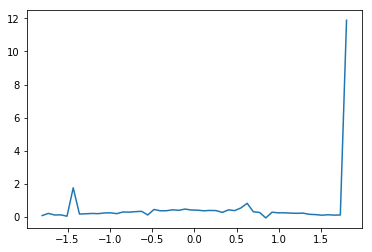

array([ 7.85878131e-02,  7.68365680e-02,  8.52746517e-02,  7.55405281e-02,
        7.95844672e-02,  1.08077551e-01,  1.01801177e-01,  5.56436826e-02,
        9.63229889e-02,  9.00939670e-02,  2.79600738e-02,  3.96355004e-01,
       -7.52520214e-01,  2.84985601e-01,  2.48760184e-02,  2.19417833e-01,
       -2.63525186e-01,  1.93194158e-01,  6.10138769e-01, -4.28022420e-02,
        2.59614694e-01, -3.45617611e-01,  3.66180771e-01, -1.48733917e-01,
        2.64048692e-01, -1.77110235e-01,  6.31038547e-01, -8.37152482e-01,
        4.35895817e-01, -1.40849312e-01,  2.30175278e-01, -2.17330043e-02,
        1.57157010e-01,  7.65482832e-02,  1.20586564e-01, -1.19688452e-02,
        2.28160925e-01,  8.90693653e-02,  6.94584065e-02,  1.44244097e-01,
        4.52339881e-02,  1.82699710e-01,  1.51298675e-01,  5.50481738e-02,
        1.69007931e-01,  4.30742845e-02,  7.37257799e-02,  9.95012411e-02,
        1.11134232e-01,  1.64066545e-01,  2.59717843e-02,  2.67544736e-01,
        1.14621519e-02,  

In [375]:
from scipy.interpolate import make_interp_spline, BSpline

T= np.asarray(x)
power= np.asarray(y)


xnew = np.linspace(-1.8,1.8,) #300 represents number of points to make between T.min and T.max

spl = make_interp_spline(T, power, k=5) #BSpline object
power_smooth = spl(xnew)

plt.plot(xnew,power_smooth)
plt.show()
spl.c

In [ ]:
from scipy.interpolate import BSpline
k = 2
t = [0, 1, 2, 3, 4, 5, 6]
c = [-1, 2, 0, -1]
spl = BSpline(t, c, k)
spl(2.5)

bspline(2.5, t, c, k)


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xx = np.linspace(1.5, 4.5, 50)
ax.plot(xx, [bspline(x, t, c ,k) for x in xx], 'r-', lw=3, label='naive')
ax.plot(xx, spl(xx), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.grid(True)
ax.legend(loc='best')
plt.show()

In [230]:
cs = CubicSpline(x,y,bc_type='natural')
power_smooth = cs(xnew)

plt.plot(xnew,power_smooth)
plt.show()
cs.c

TypeError: __init__() got an unexpected keyword argument 'k'

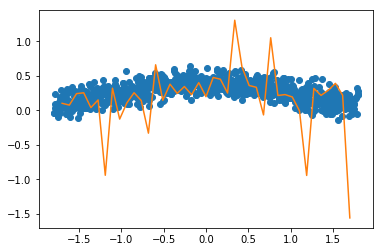

In [150]:
from scipy.interpolate import interp1d
x=Vt
y=Yt
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(-1.7, 1.7, num=41, endpoint=True)

plt.plot(x, y, 'o', xnew, f2(xnew))

plt.show()

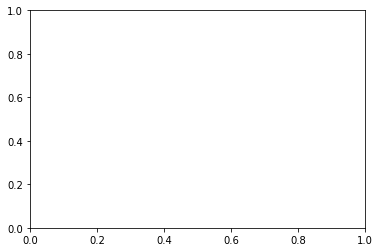

In [114]:
# Calculate the point density
xy = np.vstack([Vt,Yt])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
plt.show()

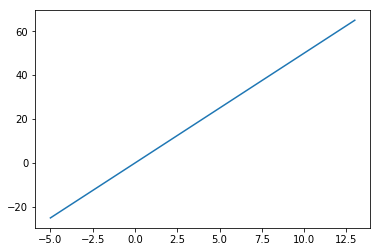

In [108]:


def kernel(x):
    return 15/16*(1-x^2)^2*[1 if x<=1 else 0]



/Users/martinbecuwe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


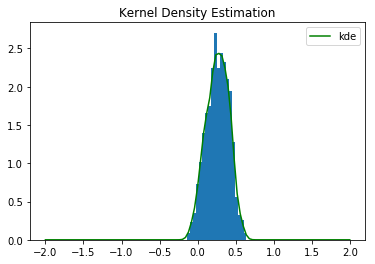

In [106]:
#Kernel Estimation

gkde=stats.gaussian_kde(Yt)

ind = np.linspace(-2,2,101)
kdepdf = gkde.evaluate(ind)

plt.figure()
# plot histgram of sample
plt.hist(Yt, bins=20, normed=1)

# plot estimated density
plt.plot(ind, kdepdf, label='kde', color="g")
plt.title('Kernel Density Estimation')
plt.legend()
#plt.show()

In [86]:
type(Vt)

list

In [90]:
len(Yt)

1000

In [21]:
a

1

In [27]:
?runif

Object `runif` not found.
